In [ ]:
%pip install numpy, matplotlib, opencv-python, jupyterlab

# Linear Filtering
### Probability Density (Gaussian Noise)

We will use the Probability Density function of the Normal Distribution (also known as the Gaussian distribution). The Normal Distribution is a bell-shaped curve, with a mean and a standard deviation. The mean is the average value of the distribution. The standard deviation is the measure of how far the values are spread out from the mean. The standard deviation is the square root of the variance. The variance is the average of the squared differences from the mean. The variance is the measure of how far the values are spread out from the mean.

first derived by De Moivre and 200 years later by both Gauss and Laplace independently. The normal distributions occurs often in nature. For example, it describes the commonly occurring distribution of samples influenced by a large number of tiny, random disturbances, each with its own unique distribution

The probability density function for the Gaussian distribution is:

$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $

where 
$\mu$ is the mean
$\sigma$ is the standard deviation. 
The square of the standard deviation, $\sigma^2$, is called the variance.



$ f(x,y) = \overbrace{\widehat{f}(x,y)}^{\text{Ideal Image}} + \overbrace{\eta(x,y)}^{\text{Noise Process}} $

Below logic visualizes Probability Density. We take an horizontal slice through one row of the original image and plot the intensities along the slice, and repeat the same process for the edited image. When the curves are compared, it is observed that pixel intensities vary around the true value.

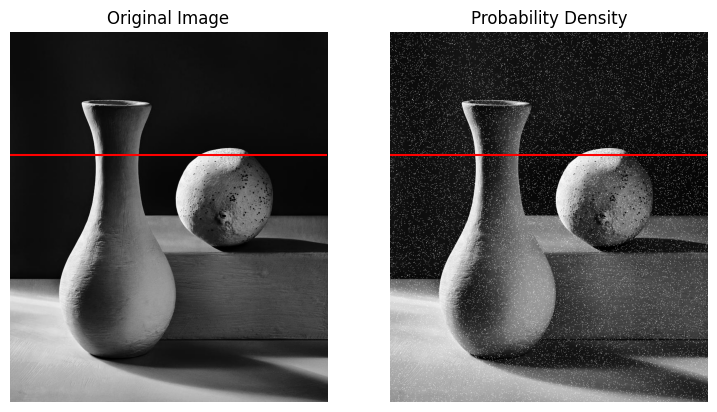

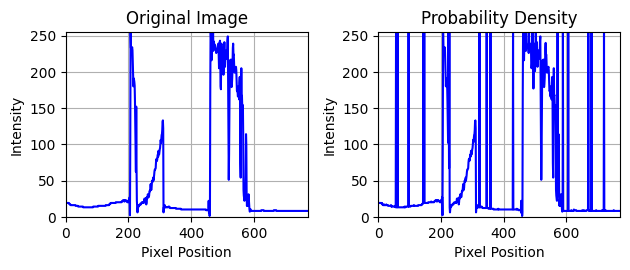

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image_path = 'img/gaussian_original.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    print(f"Failed to load image from path: {image_path}")
else:
    # Display the original image and noisy image side by side
    plt.figure(figsize=(9, 6))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axhline(original_image.shape[0] // 3, color='r', linestyle='-')
    plt.axis('off')

    # Gaussian noise parameters
    mean = 0
    variance = 0.3  # varience controls the amount of noise
    sigma = variance ** 0.5
    gaussian_noise = np.random.normal(mean, sigma, original_image.shape)
    gaussian_noise = gaussian_noise.reshape(original_image.shape).astype('uint8')

    # Adding Gaussian noise to the original image
    noisy_image = cv2.add(original_image, gaussian_noise)

    # Plot the noisy image
    plt.subplot(1, 2, 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Probability Density')
    plt.axhline(original_image.shape[0] // 3, color='r', linestyle='-')
    plt.axis('off')

    plt.show()

    # Original Image
    # Selecting a row (slice) for the horizontal section plot
    row_index_original = original_image.shape[0] // 3  # Row
    intensities_original = original_image[row_index_original, :]

    # Plotting the horizontal section (pixel intensities along the selected row)
    plt.subplot(2, 2, 3)
    plt.plot(intensities_original, color='b')
    plt.title('Original Image')
    plt.xlabel('Pixel Position')
    plt.ylabel('Intensity')
    plt.xlim(0, len(intensities_original))
    plt.ylim(0, 255)  # ylim is adjusted based on intensity range (0-255 for grayscale)
    plt.grid(True)



    # Probability Density Image
    # Selecting a row (slice) for the horizontal section plot
    row_index_noisy = noisy_image.shape[0] // 3  # Row
    intensities_noisy = noisy_image[row_index_noisy, :]

    # Plotting the horizontal section (pixel intensities along the selected row)
    plt.subplot(2, 2, 4)
    plt.plot(intensities_noisy, color='b')
    plt.title('Probability Density')
    plt.xlabel('Pixel Position')
    plt.ylabel('Intensity')
    plt.xlim(0, len(intensities_noisy))
    plt.ylim(0, 255)  # ylim is adjusted based on intensity range (0-255 for grayscale)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


### References

---

[1] P. R. Peebles Jr., “Central Limit Theorem” in “Probability, Random Variables and Random Signal Principles”, 4th ed., 2001, pp. 51, 51, 125.

[2] Wikipedia, “Normal distribution”, https://en.wikipedia.org/wiki/Normal_distribution

